File name needs to be updated

In [1]:
import pandas as pd
from IPython.display import display
import re
from datetime import datetime
import matplotlib.pyplot as plt
# read file ##update file path and name
df = pd.read_csv('C:/Users/yali.li/Documents/LIMS_Query/G0156_Revenue/01-07_G0156.csv',sep = ',', header = None, encoding = 'unicode_escape') 
#add header 
df.columns = ['WO#', 'Company', 'Customer', 'Quantity', 'Unit_Price', 'Discount', 'Revenue', 'Time', 'Priority', 'Item_Code', 'Billing_Desc', 'Invoice_Data', 'Data_Created', 'Territory', 'Location','Lab', 'Salesperson']


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   WO#           62 non-null     object
 1   Company       62 non-null     object
 2   Customer      62 non-null     object
 3   Quantity      62 non-null     int64 
 4   Unit_Price    62 non-null     int64 
 5   Discount      62 non-null     int64 
 6   Revenue       62 non-null     int64 
 7   Time          62 non-null     object
 8   Priority      62 non-null     object
 9   Item_Code     62 non-null     object
 10  Billing_Desc  62 non-null     object
 11  Invoice_Data  62 non-null     object
 12  Data_Created  62 non-null     object
 13  Territory     53 non-null     object
 14  Location      62 non-null     object
 15  Lab           62 non-null     object
 16  Salesperson   62 non-null     object
dtypes: int64(4), object(13)
memory usage: 8.4+ KB


In [3]:
df.head()

,WO#,Company,Customer,Quantity,Unit_Price,Discount,Revenue,Time,Priority,Item_Code,Billing_Desc,Invoice_Data,Data_Created,Territory,Location,Lab,Salesperson
0,22-00380,DUPONT,STAPHANIE LOUIE,-14,2400,0,-33600,EA,P,G0156-LCU-P-R,Priority LC-MS Analysis,4/28/2022 0:00,1/11/2022 9:38,BAYA,FREMONT,ORGANIC,FLOYD.MCCLUNG
1,22-00380,DUPONT,STAPHANIE LOUIE,14,2400,0,33600,EA,P,G0156-LCU-P-R,Priority LC-MS Analysis,4/28/2022 15:21,1/11/2022 9:38,BAYA,FREMONT,ORGANIC,FLOYD.MCCLUNG
2,22-00380,DUPONT,STAPHANIE LOUIE,14,2400,0,33600,EA,P,G0156-LCU-P-R,Priority LC-MS Analysis,5/31/2022 0:00,1/11/2022 9:38,BAYA,FREMONT,ORGANIC,FLOYD.MCCLUNG
3,22-02102,JSR MICRO INC,SIRISH RIMAL,1,832,0,832,EA,N,G0156-LCU-N-R,LC-MS Analysis,3/9/2022 0:00,2/18/2022 15:44,PACW,FREMONT,ORGANIC,JERRY.SMITH
4,22-02102,JSR MICRO INC,SIRISH RIMAL,1,832,0,832,EA,N,G0156-LCU-N-R,LC-MS Analysis,3/9/2022 0:00,2/18/2022 15:44,PACW,FREMONT,ORGANIC,JERRY.SMITH


In [4]:
#extract month from Invoice_Data column
Month=[datetime.strptime(i, '%m/%d/%Y %H:%M').month for i in df['Invoice_Data']]

In [5]:
#add a column 'Month' to the df
df['Month']=Month
df.head()

,WO#,Company,Customer,Quantity,Unit_Price,Discount,Revenue,Time,Priority,Item_Code,Billing_Desc,Invoice_Data,Data_Created,Territory,Location,Lab,Salesperson,Month
0,22-00380,DUPONT,STAPHANIE LOUIE,-14,2400,0,-33600,EA,P,G0156-LCU-P-R,Priority LC-MS Analysis,4/28/2022 0:00,1/11/2022 9:38,BAYA,FREMONT,ORGANIC,FLOYD.MCCLUNG,4
1,22-00380,DUPONT,STAPHANIE LOUIE,14,2400,0,33600,EA,P,G0156-LCU-P-R,Priority LC-MS Analysis,4/28/2022 15:21,1/11/2022 9:38,BAYA,FREMONT,ORGANIC,FLOYD.MCCLUNG,4
2,22-00380,DUPONT,STAPHANIE LOUIE,14,2400,0,33600,EA,P,G0156-LCU-P-R,Priority LC-MS Analysis,5/31/2022 0:00,1/11/2022 9:38,BAYA,FREMONT,ORGANIC,FLOYD.MCCLUNG,5
3,22-02102,JSR MICRO INC,SIRISH RIMAL,1,832,0,832,EA,N,G0156-LCU-N-R,LC-MS Analysis,3/9/2022 0:00,2/18/2022 15:44,PACW,FREMONT,ORGANIC,JERRY.SMITH,3
4,22-02102,JSR MICRO INC,SIRISH RIMAL,1,832,0,832,EA,N,G0156-LCU-N-R,LC-MS Analysis,3/9/2022 0:00,2/18/2022 15:44,PACW,FREMONT,ORGANIC,JERRY.SMITH,3


In [6]:
#generate a monthly summary table based on revenue
df_monthly=df.groupby(['Month']).sum()[['Quantity', 'Revenue']]
df_monthly

,Quantity,Revenue
Month,,
3,3,2496
4,17,20782
5,29,46080
6,11,14144
7,13,10816


In [14]:
#annual total revenue
G0290_Revenue_2022 = df_monthly['Revenue'].sum()
G0290_Revenue_2022

94318

In [15]:
#annual total # of samples
G0290_Samples_2022 = df_monthly['Quantity'].sum()
G0290_Samples_2022

73

Figure out # of companies worked with and respective sample number and revenue, including priority samples

In [7]:
#generate a monthly summary table based on both company and revenue
df_monthly_company = df.groupby(['Month','Company']).sum()[['Quantity','Revenue']]
df_monthly_company

Quantity  Revenue
Month Company                             
3     JSR MICRO INC             3     2496
4     DUPONT                    0        0
      JSR MICRO INC             8    13312
      NALCO WATER               9     7470
5     DUPONT                   14    33600
      JSR MICRO INC            15    12480
6     JSR MICRO INC            11    14144
7     JSR MICRO INC             4     3328
      KANTO CORPORATION         9     7488

In [16]:
#calculate priority sample number
df_priority = df[df['Priority']=='P']
df_priority=df_priority.groupby(['Month', 'Company']).sum()[['Quantity']]
df_priority.columns=['Priority_Quantity']
df_priority=df_monthly_company.join(df_priority, how='left').fillna(0).astype('int64')
df_priority

Quantity  Revenue  Priority_Quantity
Month Company                                                
3     JSR MICRO INC             3     2496                  0
4     DUPONT                    0        0                  0
      JSR MICRO INC             8    13312                  8
      NALCO WATER               9     7470                  0
5     DUPONT                   14    33600                 14
      JSR MICRO INC            15    12480                  0
6     JSR MICRO INC            11    14144                  6
7     JSR MICRO INC             4     3328                  0
      KANTO CORPORATION         9     7488                  0

In [28]:
df_priority_monthly=df_priority.groupby(['Month']).sum()[['Priority_Quantity']]
df_priority_monthly=df_monthly.join(df_priority_monthly, how='left').fillna(0).astype('int64')
df_priority_monthly

,Quantity,Revenue,Priority_Quantity
Month,,,
3,3,2496,0
4,17,20782,8
5,29,46080,14
6,11,14144,6
7,13,10816,0


Further dig into the data, monthly revenue, monthly # of samplels, etc.

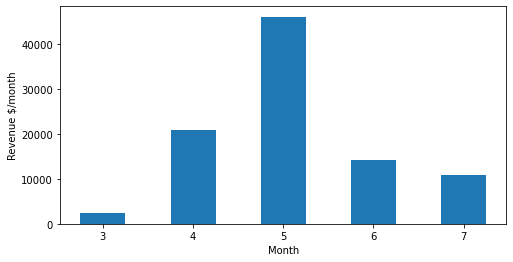

In [20]:
plt.figure(figsize = (8,4))
plt.bar(df_monthly.index.values, df_monthly['Revenue'],  width=0.5)
plt.xticks(df_monthly.index.values)
plt.xlabel('Month')
plt.ylabel('Revenue $/month')
plt.show()

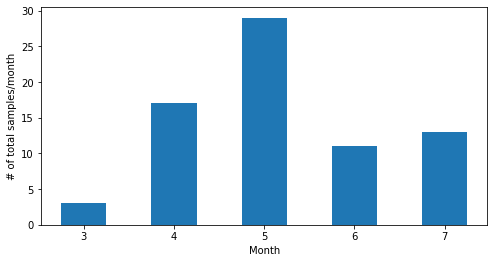

In [21]:
plt.figure(figsize = (8,4))
plt.bar(df_monthly.index.values, df_monthly['Quantity'],  width=0.5)
plt.xticks(df_monthly.index.values)
plt.xlabel('Month')
plt.ylabel('# of total samples/month')
plt.show()

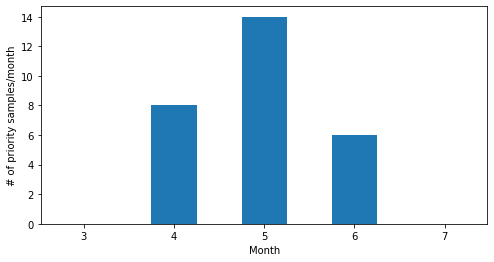

In [29]:
plt.figure(figsize = (8,4))
plt.bar(df_priority_monthly.index.values, df_priority_monthly['Priority_Quantity'],  width=0.5)
plt.xticks(df_priority_monthly.index.values)
plt.xlabel('Month')
plt.ylabel('# of priority samples/month')
plt.show()